In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
import sympy as sym

# Curvas e campos vetoriais

## $ \S 1 $ Visualizando curvas no espa√ßo

Uma __curva__ (parametrizada) em $ \mathbb R^n $ √© uma fun√ß√£o $ \boldsymbol r \colon I
\to \mathbb R^n $ definida num intervalo $ I $.  

__Exemplo 1:__ Sejam $ \boldsymbol p $ e $ \boldsymbol q $ dois pontos distintos
quaisquer em $ \mathbb R^3 $ (ou $ \mathbb R^n $). O _segmento de reta_
ligando $ \boldsymbol p $ a $ \boldsymbol q $ √© parametrizado por
$$
\boldsymbol r(t) = \boldsymbol p + t\, (\boldsymbol q - \boldsymbol p)
= (1- t)\, \boldsymbol p + t\, \boldsymbol q
\qquad \text{para $ t \in [0, 1] \,$.}
$$
Se estendermos o dom√≠nio a $ \mathbb R $, obteremos uma parametriza√ß√£o da _reta_
por $ \boldsymbol p $ e $ \boldsymbol q $, e se restringirmos $ t $ a $ [0, +\infty) $,
obteremos uma parametriza√ß√£o da _semi-reta_ com origem em $ \boldsymbol p $ de
dire√ß√£o $ \boldsymbol q - \boldsymbol p $.

__Exerc√≠cio:__ Calcule a derivada da curva parametrizada $ \boldsymbol r $ do
Exemplo 1. O que acontece se trocarmos $ t $ por $ 1 - t $ na defini√ß√£o? O que
acontece se alterarmos o dom√≠nio para $ \big[0, \frac{1}{2}\big] $ e
substituirmos $ t $ por $ 2t $?

Se pensarmos numa curva parametrizada $ \boldsymbol r(t) $ como a descri√ß√£o da
posi√ß√£o de uma part√≠cula com respeito ao tempo $ t $, ent√£o a
derivada $ \boldsymbol r'(t) $ representar√° a sua _velocidade_, a norma (magnitude)
$ \Vert \boldsymbol r'(t) \Vert $ da derivada a sua _rapidez_, e a segunda derivada
$ \boldsymbol r''(t) $ a sua _acelera√ß√£o_.

__Exemplo 2:__ Uma _h√©lice_ sobre o cilindro em $ \mathbb R^3 $ de raio $ a > 0 $ 
descrito pela equa√ß√£o $ x^2 + y^2 = a^2 $ pode ser parametrizada por
$$
    \boldsymbol r(t) = a\cos(2\pi t)\,\boldsymbol i + a\sin (2\pi t)\,\boldsymbol j + bt\,\boldsymbol k\,.
$$
Aqui
$$
    \boldsymbol i = \boldsymbol{e}_1 = (1, 0, 0), \qquad 
    \boldsymbol j = \boldsymbol{e}_2 = (0, 1, 0), \qquad 
    \boldsymbol k = \boldsymbol{e}_3 = (0, 0, 1),
$$
s√£o os tr√™s vetores da base can√¥nica de $ \mathbb R^3 $ e $ b \ne 0 $ √© a
diferen√ßa de altura correspondente a uma rota√ß√£o completa.  Intuitivamente, a
imagem da h√©lice se parece com uma mola. Vamos visualiz√°-la usando a Matplotlib;
a sintaxe √© praticamente id√™ntica √†quela para o desenho de gr√°ficos de uma
fun√ß√£o de uma vari√°vel. Por concretude, tomemos $ a = b = 1 $.

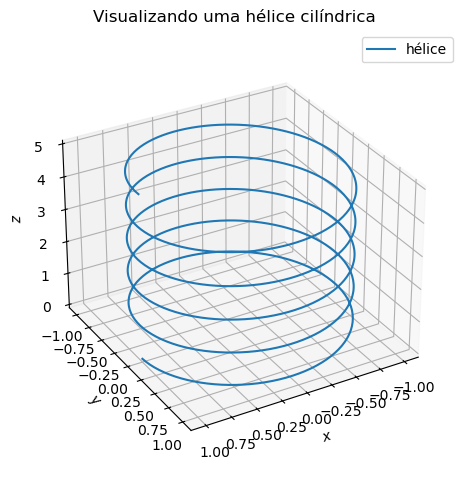

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Par√¢metros da h√©lice:
a = 1  #  raio
b = 1  #  passo

# Amostra de valores de t:
ts = np.linspace(0, 5, 1000)  # 1000 pontos em [0, 5]

# Temos que descrever as fun√ß√µes-coordenadas da curva. As equa√ß√µes param√©tricas s√£o:
xs = a * np.cos(2 * np.pi * ts)
ys = a * np.sin(2 * np.pi * ts)
zs = b * ts

# Plotando a h√©lice:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")
ax.plot(xs, ys, zs, label="h√©lice")

# Adicionando uma legenda, um t√≠tulo e r√≥tulos aos eixos:
ax.legend()
ax.set_title("Visualizando uma h√©lice cil√≠ndrica")
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")

# Ajustando o √¢ngulo de visualiza√ß√£o:
ax.view_init(elev=30, azim=60)
# Reduzindo o zoom para n√£o encobrir a etiqueta do eixo-z:
ax.set_box_aspect(aspect=None, zoom=0.9)

# Mostrando o resultado:
fig.tight_layout()
plt.show()

Utilizando o subm√≥dulo `animation` do Matplotlib, podemos at√© criar uma anima√ß√£o ilustrando o movimento de uma part√≠cula que se desloca de acordo com esta parametriza√ß√£o.

In [28]:
# Importando as bibliotecas necess√°rias:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

# Par√¢metros da nossa h√©lice:
a = 1  # raio
b = 1  # passo

# Amostra de valores de t:
ts = np.linspace(0, 5, 200)

# Equa√ß√µes param√©tricas:
xs = a * np.cos(2 * np.pi * ts)
ys = a * np.sin(2 * np.pi * ts)
zs = b * ts

# Configura√ß√£o da figura e dos eixos 3D:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection="3d")

# Delimitando a regi√£o a ser mostrada:
ax.set_xlim([-a, a])
ax.set_ylim([-a, a])
ax.set_zlim([0, b * 5])

# Adicionando um t√≠tulo e r√≥tulos aos eixos:
ax.set_title("Movimento helicoidal no cilindro $ x^2 + y^2 = 1 $")
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")

# Curva inicial vazia:
line, = ax.plot([], [], [], linewidth=2)

# Fun√ß√£o de inicializa√ß√£o para definir a curva:
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

# Fun√ß√£o para atualizar os quadros (frames) da anima√ß√£o:
def update(T):
    # Plotando a imagem da curva para t entre 0 e T:
    line.set_data(xs[:T], ys[:T])
    line.set_3d_properties(zs[:T])
    return line,

# Criando a anima√ß√£o:
ani = animation.FuncAnimation(fig, update, frames=len(ts), init_func=init,
                              interval=50, blit=False)

plt.close()  # Suprimindo a figura est√°tica que aparece depois do v√≠deo
# Retornando o resultado:
HTML(ani.to_jshtml());

Animation size has reached 21014742 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


üìù Recorde que para salvar um gr√°fico num arquivo externo, podemos utilizar
`plt.savefig("meu_grafico.png")` antes de `plt.show()`. Para salvar uma anima√ß√£o
(digamos `ani`), utilize `ani.save("minha_animacao.mp4", writer="ffmpeg")`.
Neste √∫ltimo caso, √© necess√°rio ter o pacote `ffmpeg` instalado no computador.

__Exerc√≠cio:__ Mostre (sem ajuda do Python) que a velocidade e acelera√ß√£o de
uma part√≠cula cujo movimento √© descrito pela h√©lice parametrizada do exemplo
anterior s√£o ortogonais para todo $ t $. _Dica:_ Calcule o produto interno
$ \boldsymbol r'(t) \cdot \boldsymbol r''(t) $.

__Exerc√≠cio:__ Plote as seguintes curvas parametrizadas.  A imagem √© uma curva
familiar? Descreva esta imagem atrav√©s de equa√ß√µes cartesianas.

(a) A curva no plano descrita por
$$
    \alpha(t) = (t^2 - 1)\,\boldsymbol i + 2t\,\boldsymbol j\,.
$$
_Dica:_ Como esta curva √© planar (i.e., a imagem est√° em $ \mathbb R^2 $),
voc√™ deve omitir o argumento `"projection=3d"` da fun√ß√£o `fig.add_subplot()`.

(b) A curva no espa√ßo descrita por
$$
    \beta(t) = \sqrt{2}\, t\, \boldsymbol i + \sqrt{2}\, t\, \boldsymbol j + (4 - t^2)\, \boldsymbol k\,.
$$

(c) A curva no espa√ßo descrita por
$$
    \gamma(t) = \big(\cosh (3t)\,,\, \operatorname{senh}(3t)\,,\, \operatorname{senh}(3t) \big)
$$
onde por defini√ß√£o o _cosseno hiperb√≥lico_ e o _seno hiperb√≥lico_ s√£o as fun√ß√µes $ \mathbb R \to \mathbb R $ dadas por
$$
\cosh t = \frac{e^t + e^{-t}}{2} \qquad \text{e} \qquad \operatorname{senh} t = \frac{e^t - e^{-t}}{2}\,.
$$
_Dica:_ Observe que $ \cosh^2 t - \operatorname{senh}^2 t = 1 $ para todo $ t $.

## $ \S 2 $ Campos vetoriais

__Exemplo 1:__ Considere um planeta com massa $ M $ localizado na origem de um
sistema de coordenadas. O _campo gravitacional_ $ \boldsymbol{g} $ gerado por ele √©
pode ser expresso como uma fun√ß√£o
$$
    \boldsymbol{g} \colon \mathbb{R}^3 \to \mathbb{R}^3, \qquad
    \boldsymbol{g}(\boldsymbol{x}) = -\frac{GM}{\Vert\boldsymbol{x}\Vert^3}\, \boldsymbol{x}
$$
onde $ \boldsymbol{x} = (x, y, z) $ √© o vetor posi√ß√£o de um ponto arbitr√°rio e $ G $
√© a constante gravitacional.

Generalizando este exemplo, um **campo vetorial** √© uma fun√ß√£o 
$$
    \boldsymbol F \colon D \subseteq \mathbb R^m \to \mathbb R^n
$$
que atribui um _vetor_ de $ \mathbb R^n $ a cada ponto do seu dom√≠nio $ D $,
subconjunto de $ \mathbb R^m $.

Observe que uma curva pode ser considerada um campo vetorial cujo dom√≠nio tem
dimens√£o $ 1 $, enquanto uma fun√ß√£o escalar $ f $ de v√°rias vari√°veis √© um
"campo vetorial" cujo contra-dom√≠nio tem dimens√£o $ 1 $.  Contudo, _na maioria
das aplica√ß√µes de campos vetoriais, temos_ $ m = n \ge 2 $.

Um campo de vetores tridimensionais definido numa regi√£o de $ \mathbb R^3 $ pode
ser descrito atrav√©s de uma f√≥rmula do tipo
$$
    \boldsymbol{F}(x, y, z) = M(x, y, z)\,\boldsymbol{i} + N(x, y, z)\,\boldsymbol{j}
    + P(x, y, z)\,\boldsymbol{k}\,.
$$
Aqui as **componentes** $ M $, $ N $ e $ P \colon D \to \mathbb R $ s√£o fun√ß√µes
escalares, ou seja, tomam valores em $ \mathbb R $. 
O campo vetorial $ \boldsymbol F $ √© dito **cont√≠nuo** se as suas componentes s√£o
cont√≠nuas; **diferenci√°vel** se $ M $, $ N $ e $ P $ s√£o diferenci√°veis; e assim
por diante. 

Mais geralmente, um campo vetorial $ \boldsymbol F \colon D \subseteq \mathbb R^m
\to \mathbb R^n $ pode ser expresso em termos das suas componentes $ f_i \colon
D \subseteq \mathbb R^m \to \mathbb R $ com respeito √† base can√¥nica de
$ \mathbb R^n $:
$$
    \boldsymbol F = f_1\,\boldsymbol{e}_1 + \cdots + f_n\,\boldsymbol{e}_n\,.
$$
Em √∫ltima inst√¢ncia podemos portanto reduzir qualquer conceito ou pergunta a
respeito de $ \boldsymbol F $ noutro equivalente envolvendo suas componentes $ f_i $,
que s√£o fun√ß√µes escalares. Por exemplo, qualquer derivada parcial de $ \boldsymbol F
$ √©, por defini√ß√£o, o resultado da deriva√ß√£o parcial correspondente de cada uma
de suas componentes.  Apesar de n√£o haver nenhuma diferen√ßa na teoria de campos
vetoriais tomando valores em espa√ßos de dimens√£o alta, conforme esta aumenta, a
visualiza√ß√£o se torna mais dif√≠cil.

## $ \S 3 $ Visualizando campos vetoriais bidimensionais

__Exemplo:__ Seja $ \boldsymbol F $ o campo vetorial no plano dado por
$$
\boldsymbol{F}(x, y) = -y\,\boldsymbol{i} + x\,\boldsymbol{j}
$$
Informalmente, os vetores descritos por $ \boldsymbol F $ giram no sentido
anti-hor√°rio ao redor da origem e t√™m a mesma magnitude que o seu ponto-base.
Vamos usar a Matplotlib para visualiz√°-lo.

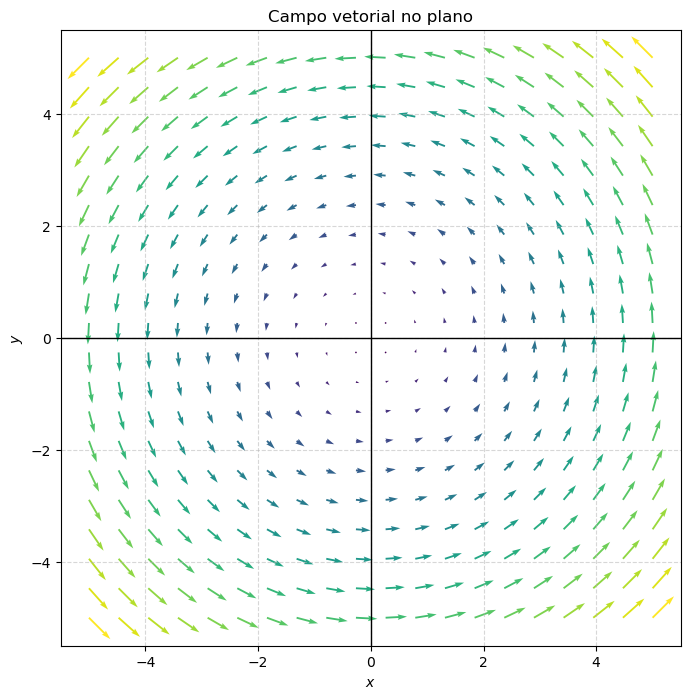

In [22]:
# Tomando uma amostra de valores de x e y:
xs = np.linspace(-5, 5, 20)  # 20 pontos igualmente espa√ßados em [-5, 5]
ys = np.linspace(-5, 5, 20)

# Criando a malha de pontos onde F ser√° avaliado a partir de xs e ys:
X, Y = np.meshgrid(xs, ys)

# Definindo o campo vetorial:
U = -Y  # primeira componente
V = X   # segunda componente

# Criando a figura para plotagem:
plt.figure(figsize=(8, 8))  # Tamanho da figura

# Vamos usar a magnitude do campo em cada ponto como especifica√ß√£o para a sua cor:
norma = np.sqrt(U**2 + V**2)  
# Plotando o campo vetorial:
plt.quiver(X, Y, U, V, norma, cmap="viridis")  # Plota o campo nos pontos da malha

# Etiquetando os eixos e adicionando um t√≠tulo:
plt.xlabel("$ x $") 
plt.ylabel("$ y $")
plt.title("Campo vetorial no plano")

# Plotando os dois eixos cartesianos com uma espessura maior:
plt.axhline(0, color="black",linewidth=1)
plt.axvline(0, color="black",linewidth=1)

# Adicionando uma grade ao fundo, para auxiliar a visualiza√ß√£o:
plt.grid(linestyle = "--", alpha=0.5)   # alpha controla a transpar√™ncia

# Mostrando o resultado:
plt.show()

__Exerc√≠cio:__ O que acontece com a figura do exemplo anterior se:

(a) Aumentarmos o n√∫mero de pontos na malha (aumentando o terceiro argumento de
    `linspace` nas defini√ß√µes de `xs` e `ys`) no c√≥digo acima?

(b) Trocarmos o campo $ \boldsymbol F $ por $ \boldsymbol x(x, y) = x\,\boldsymbol i + y\,\boldsymbol j $? (Observe
    que este √© o campo identidade $ \mathbb R^2  \to \mathbb R^2 $, que leva cada ponto/vetor nele mesmo).

(c) Trocarmos o campo $ \boldsymbol F $ por $ \boldsymbol H(x, y) = y\,\boldsymbol i + x\,\boldsymbol j $?

__Exerc√≠cio:__  O campo vetorial seguinte pode ser usado para modelar o fluxo de
um fluido a partir de uma fonte circular de raio $ r $ com rapidez inicial
$ u > 0 $:
$$
\boldsymbol{F}(x, y) = \frac{u}{2} \left( 1 + \frac{r^2}{\Vert\boldsymbol{x}\Vert^2}
\right) \frac{\boldsymbol{x}}{\Vert\boldsymbol{x}\Vert} \qquad \text{para $ \Vert
\boldsymbol{x} \Vert > r $}\,,
$$
onde $ \boldsymbol x = x\,\boldsymbol{i} + y\,\boldsymbol{j} $ √© o campo vetorial identidade
em $ \mathbb R^2 $.

Observe que a express√£o √† direita n√£o est√° definida em $ \boldsymbol x = \boldsymbol 0
$, mas por defini√ß√£o estamos excluindo toda a regi√£o dentro do disco de raio $ r
$, que representa a fonte de onde o fluido emana. Para simplificar, assuma que $
u = 1 $ e $ r = 1 $. Use uma m√°scara booleana para definir o valor do campo
vetorial como sendo `np.nan` dentro deste disco, e ent√£o plote $ \boldsymbol F $
completando o fragmento de c√≥digo abaixo.

In [ ]:
# Defina amostras de valores de x e y dentro do quadrado [-2, 2] x [-2, 2]:
xs = # ...
ys = # ...

# Crie a malha de pontos:
X, Y = # ...

# Defina o campo vetorial F por partes:
r = 1  # Raio do obst√°culo circular
u = 1  # Velocidade do fluxo uniforme

# Defina a fun√ß√£o que calcula a norma de um vetor em R^2:
norma = lambda x, y: # ... Use a fun√ß√£o raiz quadrada (np.sqrt)

# Defina as componentes de F:
U =  # complete a express√£o para a primeira componente
V =  # complete a express√£o para a segunda componente

# Vamos filtrar os pontos dentro do disco de raio r (onde F n√£o est√° definido,
# de acordo com o enunciado) e declarar que F vale `np.nan` ("Not A Number", ou
# "n√£o √© um n√∫mero") a√≠, para conseguirmos visualizar F mesmo esta regi√£o:
filtro = norma(X, Y) <= r
U[filtro] = np.nan
V[filtro] = ...

# Agora plote o campo!
# plt.figure ...
# plt.quiver ...
# Etique o eixo-x
# Etique o eixo-y
# Adicione o t√≠tulo

# Trace o eixo-x
# Trace o eixo-y
# Adicione o grid retangular

# Mostre o resultado

SyntaxError: invalid syntax (3392178585.py, line 5)

__Exerc√≠cio:__ Considere o campo vetorial em $ \mathbb R^2 $ dado por:
$$
    \boldsymbol G(x, y) = (\sin y ‚àí y \sin x + x)\,\boldsymbol i
    + (\cos x + x \cos y + y)\,\boldsymbol j\,.
$$

(a) Plote $ \boldsymbol G $ usando a Matplotlib.

(b) Mostre que $ \partial_2 g_1 = \partial_1 g_2 $, onde $ g_i $ √© a $ i $-√©sima
componente de $ \boldsymbol G $, √† m√£o ou usando o SymPy. 

(c) Voc√™ consegue encontrar uma fun√ß√£o escalar
$ \varphi \colon \mathbb R^2 \to \mathbb R $ tal que $ \nabla \varphi = \boldsymbol G $?

## $ \S 4 $ Gradientes como campos vetoriais

Os exemplos mais importantes de campos vetoriais s√£o os _gradientes_ de fun√ß√µes
escalares. Se $ f \colon D \subseteq \mathbb R^n \to \mathbb R $ √© uma fun√ß√£o
diferenci√°vel de $ n $ vari√°veis, seu __gradiente__ √© o campo vetorial cujas
componentes s√£o as derivadas parciais de $ f $:
$$
\nabla f \colon D \to \mathbb{R}^n, \qquad \boldsymbol{x} \mapsto \big(
\partial_1 f(\boldsymbol x)\,,\, \partial_2 f(\boldsymbol x)\,,\, \ldots\,,\,
\partial_n f(\boldsymbol x) \big)\,.
$$

Recorde que o gradiente de uma fun√ß√£o $ f $ em um ponto indica a _dire√ß√£o de maior
crescimento da fun√ß√£o_ neste ponto, e sua magnitude (norma) representa a taxa de
varia√ß√£o m√°xima de $ f $. Por exemplo, no contexto de uma superf√≠cie
topogr√°fica, o gradiente em um ponto indica a dire√ß√£o mais √≠ngreme da subida, e
sua magnitude (norma) indica a taxa com que a eleva√ß√£o sobe neste ponto e nesta
dire√ß√£o. Al√©m disto, o gradiente √© perpendicular a todas as curvas de n√≠vel de $
f $. Caso contr√°rio, se deslocando ao longo de uma curva de n√≠vel, a eleva√ß√£o
(valor da fun√ß√£o) mudaria, uma contradi√ß√£o.

Uma fun√ß√£o escalar $ \varphi \colon D \subseteq \mathbb R^n \to \mathbb R $ √© um
**potencial** de um campo vetorial
$ F \colon D \subseteq \mathbb R^n \to \mathbb R^n $ se vale
$$
\nabla \varphi = \boldsymbol F \,.
$$
Neste caso, $ \boldsymbol F $ √© dito **conservativo**, pois o teorema fundamental
do C√°lculo implica que _o trabalho realizado ao se mover uma part√≠cula sob a√ß√£o
do campo ao longo de uma curva fechada qualquer √© nulo_.  Nem todo campo
vetorial √© conservativo. O seguinte resultado fornece uma condi√ß√£o
necess√°ria para que isto aconte√ßa.

**Teorema:** 
_Seja $\boldsymbol{F} = (f_1, \ldots, f_n)$ um campo vetorial continuamente
diferenci√°vel em $ D \subseteq \mathbb{R}^n $. Se $ \boldsymbol{F} $ √© um gradiente
em $ D $, ent√£o as derivadas parciais das componentes de $\boldsymbol{F}$ est√£o
relacionadas pelas equa√ß√µes_
$$
\partial_i f_j(\boldsymbol{x}) = \partial_j f_i(\boldsymbol{x})
\qquad (\boldsymbol x \in D,\ \ i,\,j = 1, 2, \cdots, n)\,.
$$

A demonstra√ß√£o √© simples: se $ F = \nabla \varphi $, ent√£o $ f_k = \partial_k
\varphi $ para cada $ k $. Logo
$$
    \partial_i f_j = \frac{\partial^2 \varphi}{\partial x_i \partial x_j}
    = \frac{\partial^2 \varphi}{\partial x_j \partial x_i} = \partial_j f_i\,.
$$

‚ö†Ô∏è A condi√ß√£o do Teorema √© necess√°ria mas n√£o √© suficiente para garantir que o
campo seja conservativo. Contudo, ela √© suficiente no caso em que o dom√≠nio $ D
$ do campo vetorial √© simplesmente conexo (veja a observa√ß√£o abaixo). Em
particular, _vale a rec√≠proca do Teorema quando $ D = \mathbb R^n $ ou $ D $ √© um
ret√¢ngulo/paralelep√≠pedo_.

üìù $ D $ √© dito _conexo_ se para quaisquer pontos $ \boldsymbol p,\, \boldsymbol q \in D
$, existe uma curva cont√≠nua em $ D $ conectando um ao outro. E $ D $ √©
_simplesmente conexo_ se √© conexo e se dado um par qualquer de curvas ligando $
\boldsymbol p $ a $ \boldsymbol q $, uma curva pode ser continuamente deformada na
outra mantendo-se as pontas fixas. Intuitivamente, em $ \mathbb R^2 $ um
conjunto √© simplesmente conexo se e somente se ele n√£o tem "buracos". Em toda
esta discuss√£o estamos implicitamente assumindo que $ D $ √© um aberto. Para
maiores detalhes consulte o seu livro de C√°lculo.

__Exerc√≠cio:__ 

(a) Mostre que o campo vetorial 
$$
\boldsymbol{F}(x, y) = -y\,\boldsymbol{i} + x\,\boldsymbol{j}
$$
estudado no primeiro exemplo da se√ß√£o anterior _n√£o_ √© gradiente de nenhuma
fun√ß√£o $ f $. _Dica:_ Use a condi√ß√£o do teorema anterior.

(b) Mostre que o campo vetorial identidade em $ \mathbb R^2 $,
$$
\boldsymbol{G}(x, y) = x\,\boldsymbol{i} + y\,\boldsymbol{j}
$$
√© conservativo exibindo um potencial para ele. _Dica:_ Suponha que
$ G = \nabla \varphi $, para uma fun√ß√£o desconhecida $ \varphi $. Ent√£o devemos ter
$ \frac{\partial \varphi}{\partial x} = x  $.
Integre com respeito a $ x $ e depois utilize a segunda condi√ß√£o,
$ \frac{\partial \varphi}{\partial y} = y $, para determinar $ \varphi $ a menos de uma
constante.

__Exerc√≠cio:__ Seja 
$$
    f(x, y) = e^{-\frac{x^2 + y^2}{8}} \left[ \sin(x^2) + \cos(y^2) \right]\,.
$$

(a) Calcule o gradiente $ \nabla f(x, y) $. _Dica:_ Use o SymPy, complete o c√≥digo abaixo.

(b) Complete o c√≥digo abaixo para visualizar, numa mesma figura, o gradiente e
as curvas de n√≠vel de $ f $ dentro do quadrado $ [-3, 3] \times [-3, 3] $.

In [ ]:
import sympy as sym

x, y = ... # use a fun√ß√£o `sym.symbols` para definir as vari√°veis
# Definindo a fun√ß√£o f:
f = sym.exp(-(x**2 + y**2)/8) * (sym.sin(x**2) + sym.cos(y**2))
# Calcule o gradiente:
f_x = ... # sym.diff(...)
f_y = ...

# Usando `display` para exibir o resultado formatado:
display(...)
display(...)
# Usando `print` para poder copiar e colar as express√µes no item (b):
print(...)
print(...)


-x*(sin(x**2) + cos(y**2))*exp(-x**2/8 - y**2/8)/4 + 2*x*exp(-x**2/8 - y**2/8)*cos(x**2)

-y*(sin(x**2) + cos(y**2))*exp(-x**2/8 - y**2/8)/4 - 2*y*exp(-x**2/8 - y**2/8)*sin(y**2)

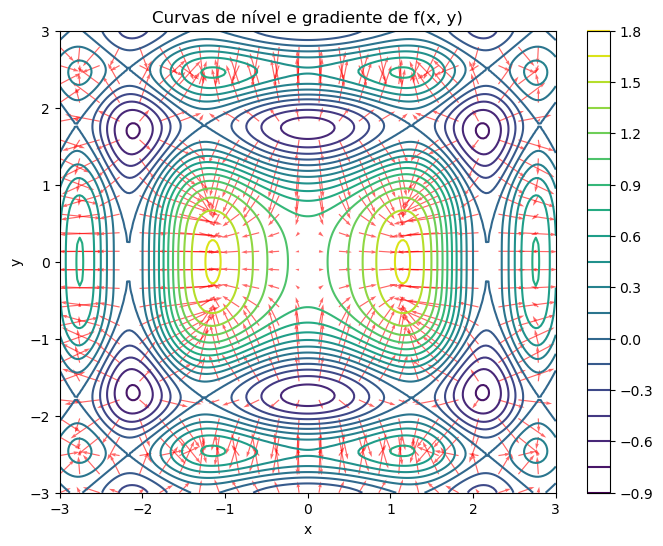

In [ ]:
from numpy import cos, sin, exp

f = lambda x, y: exp(-(x**2 + y**2) / 8) * (sin(x**2) + cos(y**2))

def gradient_f(x, y):
    """Calcula o gradiente da fun√ß√£o."""
    termo = exp(-(x**2 + y**2) / 8)
    # Complete a express√£o para f_x e f_y:
    f_x = # termo * ...
    f_y = # termo * ...

    return f_x, f_y

# Crie uma malha de pontos:
xs =  # 200 pontos no intervalo [-3, 3]
ys =  # 200 pontos no intervalo [-3, 3]
X, Y =  # ... (meshgrid)
Z = f(X, Y)

# Calculando o gradiente:
FX, FY = gradient_f(X, Y)

# Subamostra da grade para plotar os vetores (recomendado n√£o alterar):
passo = 8   # Ajuste caso queira para mudar a densidade dos vetores
X_sub, Y_sub = X[::passo, ::passo], Y[::passo, ::passo]
FX_sub, FY_sub = FX[::passo, ::passo], FY[::passo, ::passo]

# Plotagem:
fig, ax = plt.subplots()

# Adicione as curvas de n√≠vel de f, usando o mapa de cores 'viridis':
curvas =  # ...

# Adicione uma barra de cores:

# Plotando o gradiente:
ax.quiver(X_sub, Y_sub, FX_sub, FY_sub, color="red", alpha=0.6,
          scale=4, scale_units="xy")

# Etique o eixo-x
# Etique o eixo-y
# Adicione o t√≠tulo
# Exiba o resultado

## $ \S 5 $ Visualizando campos vetoriais no espa√ßo

Suponha que $ \boldsymbol F \colon D \subseteq \mathbb R^3 \to \mathbb R^3 $ seja um campo vetorial tridimensional.
O seu **rotacional**, denotado por $ \nabla \times \boldsymbol{F} $, √© uma medida da
rota√ß√£o ou "circula√ß√£o" do campo em torno de um ponto. Em coordenadas
cartesianas, o rotacional de um campo vetorial de componentes $ f_1,\,f_2,\,f_3
$ √© definido pelo determinante simb√≥lico:
$$
\nabla \times \boldsymbol{F} = \begin{vmatrix}
\boldsymbol{i} & \boldsymbol{j} & \boldsymbol{k} \\
\partial_1 & \partial_2 & \partial_3 \\
f_1 & f_2 & f_3
\end{vmatrix}
=
 \left( \partial_2 f_3 - \partial_3 f_2 \right)\, \boldsymbol{i}
 - \left( \partial_1 f_3 - \partial_3 f_1 \right)\,\boldsymbol{j}
 +  \left( \partial_1 f_2 - \partial_2 f_1 \right)\,\boldsymbol{k}
$$
Segue imediatamente do Teorema da $ \S 4 $ que _se $ \boldsymbol F $ √© conservativo,
ent√£o $ \nabla \times \boldsymbol F = \boldsymbol 0 $. Novamente, esta condi√ß√£o n√£o √©
suficiente em geral, mas este √© o caso se o dom√≠nio for todo o $ \mathbb R^3 $._

__Exemplo 1:__ 
Vamos visualizar o campo magn√©tico $ \boldsymbol{B} $ ao redor de um fio posicionado
ao longo do eixo-$ z $ pelo qual flui uma corrente el√©trica:
$$
\boldsymbol{B} = \frac{\mu_0 I}{2 \pi r} \boldsymbol{u}
$$
onde $ \mu_0 $ √© a permeabilidade do espa√ßo livre, $ I $ √© a corrente, $ r $ a
dist√¢ncia radial do fio e $ \boldsymbol u $ √© o vetor unit√°rio na dire√ß√£o azimutal
(i.e., ao redor do eixo-$ z $), ou seja, 
$$
    \boldsymbol u(x, y, z) = \frac{-y\,\boldsymbol{i} + x\, \boldsymbol{j}}{\sqrt{x^2 + y^2}}\,.
$$

Explicitamente, as componentes de $ \boldsymbol B $ s√£o:
$$
\begin{align*}
B_1 &= -\frac{\mu_0\, I\, y}{2 \pi\, (x^2 + y^2)} \\
B_2 &= \frac{\mu_0\, I \,x}{2 \pi\, (x^2 + y^2)} \\
B_3 &= 0
\end{align*}
$$
Observe que este campo vetorial √© singular (n√£o est√° definido) em pontos sobre o eixo-$ z $.
Por causa disto, no c√≥digo abaixo vamos evitar estes pontos e normalizar $ \boldsymbol B $, ou seja,
vamos na verdade plotar $ \frac{\boldsymbol B}{\Vert \boldsymbol B \Vert} $.

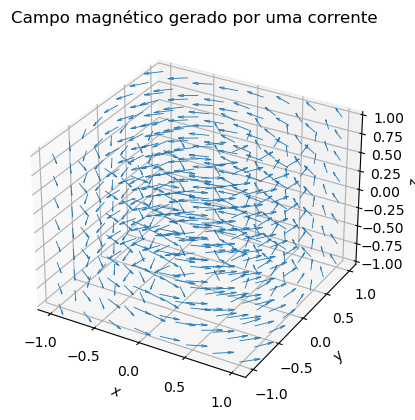

In [ ]:
def B(x, y, z, I=1, mu_0=4 * np.pi * 1e-7):
    # Dist√¢ncia radial r a partir do eixo z:
    r = np.sqrt(x**2 + y**2)
    B_1 = -mu_0 * I * y / (2 * np.pi * r**2)
    B_2 = mu_0 * I * x / (2 * np.pi * r**2)
    B_3 = np.zeros_like(x)
    
    # Lidando com a singularidade em r = 0 (divis√£o por zero):
    B_1[r == 0] = np.nan
    B_2[r == 0] = np.nan
    
    # Retornando as componentes:
    return B_1, B_2, B_3

# Criando uma malha no espa√ßo 3D:
xs = np.linspace(-1, 1, 8)  # Coordenadas x variando de -1 a 1 com 8 pontos
ys = np.linspace(-1, 1, 8)  # Coordenadas y variando de -1 a 1 com 8 pontos
zs = np.linspace(-1, 1, 8)  # Coordenadas z variando de -1 a 1 com 8 pontos
X, Y, Z = np.meshgrid(xs, ys, zs)  # Malha 3D a partir das coordenadas x, y e z

# Calculando campo magn√©tico nos pontos da malha:
B_1, B_2, B_3 = B(X, Y, Z)

# Normalizando os vetores do campo magn√©tico:
norma = np.sqrt(B_1**2 + B_2**2 + B_3**2)  # Magnitude dos vetores
B_1_unitario = B_1 / norma
B_2_unitario = B_2 / norma
B_3_unitario = B_3 / norma

# Criando uma tela (figura):
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plotando os vetores:
ax.quiver(X, Y, Z, B_1_unitario, B_2_unitario, B_3_unitario, length=0.2, linewidth=0.6)

# Rotulando os eixos, adicionando um t√≠tulo e exibindo o resultado:
ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.set_zlabel("$ z $")
ax.set_title("Campo magn√©tico gerado por uma corrente")
plt.show()

__Exerc√≠cio:__ Considere os campos vetoriais em $ \mathbb R^3 $ dados por
\begin{alignat*}{9}
    \boldsymbol{F}(x, y, z) &= (y - x^2)\,\boldsymbol{i} + (z - y^2)\,\boldsymbol{j} + (x - z^2)\,\boldsymbol{k} \\
    \boldsymbol{G}(x, y, z) &= yz\,\boldsymbol{i} + xz\,\boldsymbol{j} + xy\,\boldsymbol{k}
\end{alignat*}

(a) Visualize estes campos no cubo $ [-1, 1]^3 $.

(b) Calcule os rotacionais $ \nabla \times \boldsymbol F $ e $ \nabla \times \boldsymbol G $ e decida se eles s√£o conservativos. Em caso afirmativo, encontre potenciais para eles (fun√ß√µes escalares cujos gradientes coincidem com $ \boldsymbol F $ ou $ \boldsymbol G $).

__Exerc√≠cio:__ Complete o c√≥digo abaixo para plotar o campo vetorial
$$ \boldsymbol{F} = (6xy, 3x^2 - 3y^2) $$
na subregi√£o dentro do quadrado $ [-2, 2] \times [-2, 2] $ onde
$ \vert{H(x, y)}\vert \le 2 $, para $ H(x,y) = x^3 - 3xy^2 $.

In [ ]:
# Criando a malha de pontos:
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

# Definindo a fun√ß√£o H:
H = ...

# M√°scara booleana: |H(x,y)| ‚â§ 2:
mascara = ...

# Definindo as componentes U e V do campo F = (U, V):
U = ...
V = ...

# Aplicando a m√°scara booleana:
U_restrito = np.where(...)
V_restrito = np.where(...)

fig, ax = plt.subplots(figsize=(8, 8))

# Plotando o campo vetorial:
ax.quiver(X, Y, U_restrito, V_restrito, alpha=0.7, color="darkblue", 
         width=0.003, scale=100)

# Vamos desenhar tamb√©m as curvas de n√≠vel de H, restrita √† regi√£o de interesse:
H_restrito = np.where(mascara, H, np.nan)
niveis = np.linspace(-2, 2, 21)
curvas_de_nivel = ax.contour(X, Y, H_restrito, levels=niveis, colors="gray", 
                            alpha=0.6, linewidths=1)

# Destacando as curvas de n√≠vel na fronteira da regi√£o:
ax.contour(X, Y, H, levels=[-2, 2], colors="red", linewidths=2, 
          alpha=0.8)

ax.set_xlabel("$ x $")
ax.set_ylabel("$ y $")
ax.grid(alpha=0.3)
ax.set_title("Campo vetorial $ \\boldsymbol{F} $ e curvas de n√≠vel de $ H $")

plt.tight_layout()
plt.show()